In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv("50_Startups.csv")

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [3]:
correlation=df.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**No Multicollinearity—** Multiple regression assumes that the independent variables are not highly correlated with each other. 
When computing a matrix of Pearson’s bivariate correlations among all independent variables, the magnitude of the correlation coefficients should be less than .80.

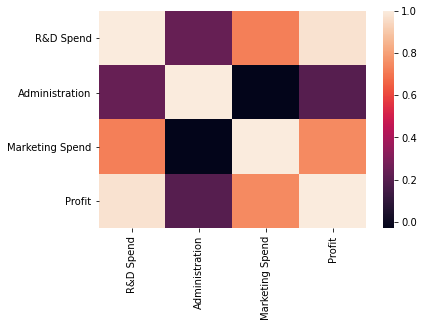

In [ ]:
sns.heatmap(correlation)

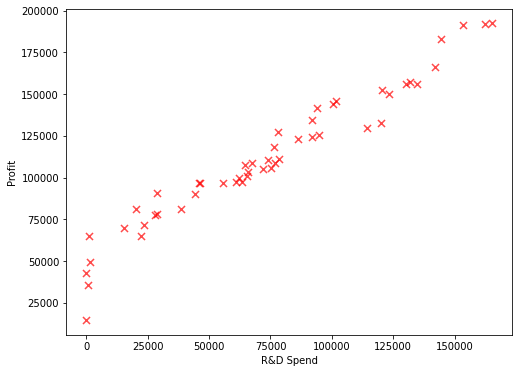

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["R&D Spend"],df["Profit"],c='r',marker='x',s=50, alpha=0.7)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

There must be a linear relationship between the outcome variable and the independent variables.

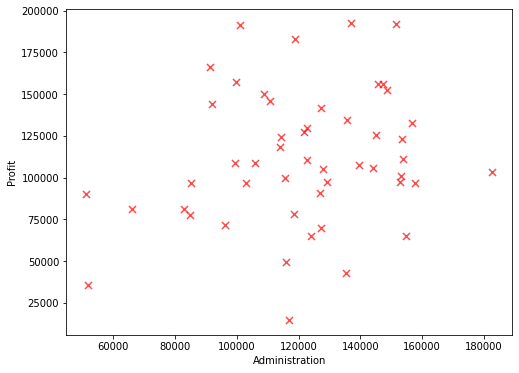

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["Administration"],df["Profit"],c='r',marker='x',s=50, alpha=0.7)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

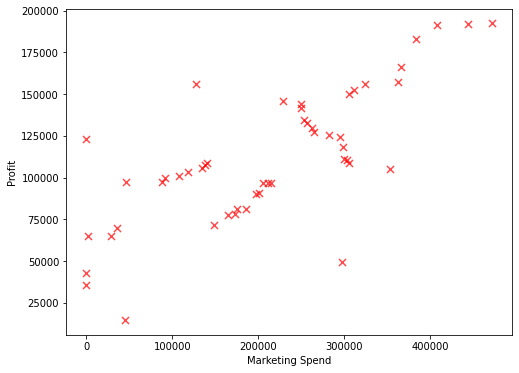

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["Marketing Spend"],df["Profit"],c='r',marker='x',s=50, alpha=0.7)
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

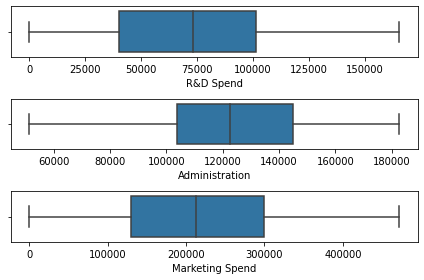

In [23]:
import seaborn as sns
fig,axs=plt.subplots(nrows=3)
plot1=sns.boxplot(x=df['R&D Spend'],ax=axs[0])
plot2=sns.boxplot(x=df['Administration'],ax=axs[1])
plot3=sns.boxplot(x=df['Marketing Spend'],ax=axs[2])
plt.tight_layout()

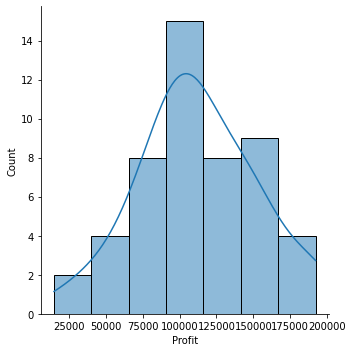

In [ ]:
sns.displot(df['Profit'],kde=True)

### **Independent and Dependent variable**

In [27]:
x=df.drop('Profit',axis=1)
y=df['Profit']/100000

### **Handling categorical variable**

In [28]:
#we are just dropping the categorical variable we can also use categorical variable to make it dummy variable
x=x.drop('State',axis=1)/100000
x.head()
 

,R&D Spend,Administration,Marketing Spend
0,1.653492,1.368978,4.717841
1,1.625977,1.513776,4.438985
2,1.534415,1.011456,4.079345
3,1.443724,1.186719,3.831996
4,1.421073,0.913918,3.661684


### **Applying model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
mlr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=np.random)

In [37]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_test_pred=mlr.predict(x_test)
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
df2.head()

,Actual,Predicted
38,0.812291,0.701908
31,0.974836,0.967057
23,1.087340,1.105129
5,1.569911,1.651638
46,0.494908,0.556086


In [39]:
df2['Residuals']=df2['Actual']-df2['Predicted']
df2

,Actual,Predicted,Residuals
38,0.812291,0.701908,0.110383
31,0.974836,0.967057,0.007778
23,1.087340,1.105129,-0.017789
5,1.569911,1.651638,-0.081727
46,0.494908,0.556086,-0.061178
43,0.697590,0.590185,0.107404
14,1.326026,1.495834,-0.169807
19,1.227769,1.147808,0.079960
40,0.782399,0.743004,0.039395
9,1.497600,1.560562,-0.062962


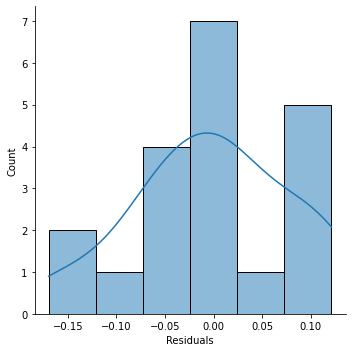

In [40]:
sns.displot(df2['Residuals'],kde=True)

**Multivariate Normality–** Multiple regression assumes that the residuals are normally distributed.

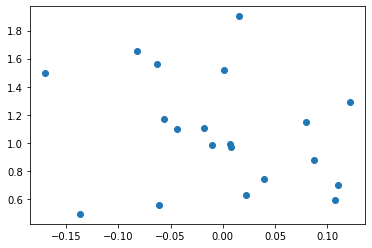

In [41]:
plt.scatter(df2['Residuals'],df2['Predicted'])

The last assumption of multiple linear regression is homoscedasticity.  A scatterplot of residuals versus predicted values is good way to check for homoscedasticity.  There should be no clear pattern in the distribution; if there is a cone-shaped pattern, the data is heteroscedastic

we have compared the Predicted values with the original values. Now we have to calculate the accuracy of our model, which was implemented by a concept called **r2_score**.

In [45]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_test_pred)
print(' r2 socre is ',score)
print('mean_sqrd_error is= ',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared error of is= ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

 r2 socre is  0.9579134370938087
mean_sqrd_error is=  0.006111409975793091
root_mean_squared error of is=  0.07817550751861539
